In [2]:
import pandas as pd
import numpy as np

crisis = pd.read_csv("x3.csv")

In [3]:
crisis.head()

,Unnamed: 0,year,ISO2 Code,ENDE_XDC_USD_RATE,couprisk,broad_reserves_ratio,broad_base_ratio,foreignassets_reserves_ratio,inflation,current_account,...,imports_fx,exchange_change,exchange_change_12m,net_debt,lending_borrowing,lending_rate,M2,claims_private,pred,precrisis
0,0,1990-02-01,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301421,0
1,1,1990-02-01,AO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301421,0
2,2,1990-02-01,AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301421,1
3,3,1990-02-01,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301421,0
4,4,1990-02-01,BD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301421,0


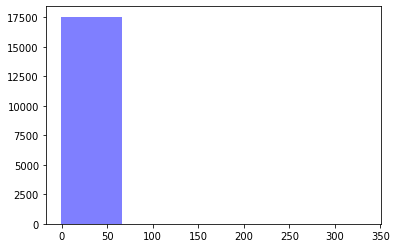

In [8]:
import matplotlib.pyplot as plt


num_bins = 5
plt.hist(crisis['exchange_change'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.distplot();

In [13]:
crisis1 = crisis[['year','exchange_change','pred','ISO2 Code']]


In [14]:
crisis1.head()

,year,exchange_change,pred,ISO2 Code
0,1990-02-01,NaN,0.301421,AF
1,1990-02-01,NaN,0.301421,AO
2,1990-02-01,NaN,0.301421,AR
3,1990-02-01,NaN,0.301421,AZ
4,1990-02-01,NaN,0.301421,BD


In [17]:
crisis2 = crisis1.dropna()

In [18]:
crisis2

,year,exchange_change,pred,ISO2 Code
300,1990-08-01,0.000000,0.155709,AF
301,1990-08-01,0.000000,0.976258,AO
302,1990-08-01,2.198391,0.381595,AR
303,1990-08-01,0.000000,0.348212,AZ
304,1990-08-01,0.000000,0.145175,BD
...,...,...,...,...
17845,2019-10-01,0.008627,0.050414,UG
17846,2019-10-01,0.044708,0.083771,UY
17847,2019-10-01,0.000000,0.031258,VE
17848,2019-10-01,0.002089,0.042309,VN


In [21]:
crisis3 = crisis2[crisis2["ISO2 Code"]!="VE"]
crisis4 = crisis3[crisis2["ISO2 Code"]!="MM"]
crisis4

C:\Users\leomf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,year,exchange_change,pred,ISO2 Code
300,1990-08-01,0.000000,0.155709,AF
301,1990-08-01,0.000000,0.976258,AO
302,1990-08-01,2.198391,0.381595,AR
303,1990-08-01,0.000000,0.348212,AZ
304,1990-08-01,0.000000,0.145175,BD
...,...,...,...,...
17844,2019-10-01,-0.023100,0.286226,UA
17845,2019-10-01,0.008627,0.050414,UG
17846,2019-10-01,0.044708,0.083771,UY
17848,2019-10-01,0.002089,0.042309,VN


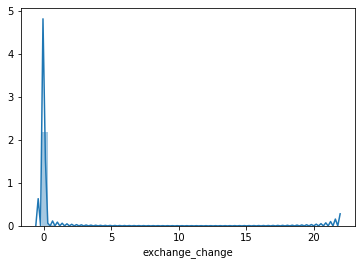

In [22]:
sns.distplot(crisis4['exchange_change'])

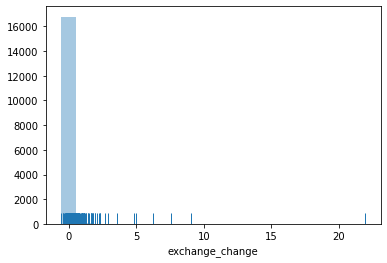

In [23]:
sns.distplot(crisis4['exchange_change'], bins=20, kde=False, rug=True)

In [24]:
crisis4.head()

,year,exchange_change,pred,ISO2 Code
300,1990-08-01,0.000000,0.155709,AF
301,1990-08-01,0.000000,0.976258,AO
302,1990-08-01,2.198391,0.381595,AR
303,1990-08-01,0.000000,0.348212,AZ
304,1990-08-01,0.000000,0.145175,BD


In [29]:
crisis4['Indicator'] = np.where(crisis4['pred']>=0.5, 'Crisis', 'Tranquil')
crisis4.head()

C:\Users\leomf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,exchange_change,pred,ISO2 Code,Indicator
300,1990-08-01,0.000000,0.155709,AF,Tranquil
301,1990-08-01,0.000000,0.976258,AO,Crisis
302,1990-08-01,2.198391,0.381595,AR,Tranquil
303,1990-08-01,0.000000,0.348212,AZ,Tranquil
304,1990-08-01,0.000000,0.145175,BD,Tranquil


In [87]:
crise = crisis[['year','exchange_change','pred','ISO2 Code']]
crise['exchange_change_12m'] = crisis.groupby('ISO2 Code')['exchange_change_12m'].shift(12)


C:\Users\leomf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
crise.head()

,year,exchange_change,pred,ISO2 Code,exchange_change_12m
0,1990-02-01,NaN,0.301421,AF,NaN
1,1990-02-01,NaN,0.301421,AO,NaN
2,1990-02-01,NaN,0.301421,AR,NaN
3,1990-02-01,NaN,0.301421,AZ,NaN
4,1990-02-01,NaN,0.301421,BD,NaN


In [106]:
crise1 = crise[crise["exchange_change_12m"]<0.3]
crise1['Indicator'] = np.where(crise1['pred']>=0.5, 'Crisis', 'Tranquil')
crise1 = crise1.query('year > "2010-12-31"')

C:\Users\leomf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


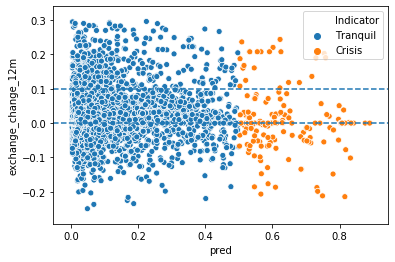

In [107]:
ax = sns.scatterplot(x="pred", y="exchange_change_12m", hue="Indicator",
...                      data=crise1)
ax.axhline(0.1, ls='--')
ax.axhline(0, ls='--')

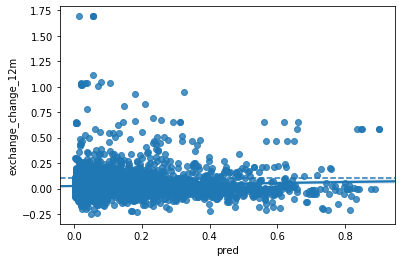

In [94]:
ax = sns.regplot(x="pred", y="exchange_change_12m",
...                      data=crise1)
ax.axhline(0.1, ls='--')


In [36]:
crisis4.head()

,year,exchange_change,pred,ISO2 Code,Indicator
300,1990-08-01,0.000000,0.155709,AF,Tranquil
301,1990-08-01,0.000000,0.976258,AO,Crisis
302,1990-08-01,2.198391,0.381595,AR,Tranquil
303,1990-08-01,0.000000,0.348212,AZ,Tranquil
304,1990-08-01,0.000000,0.145175,BD,Tranquil


In [39]:
crisis4['Warning Dummy'] = np.where(crisis4['pred']>=0.5, 1, 0)
crisis4.head()

C:\Users\leomf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,exchange_change,pred,ISO2 Code,Indicator,Severe Warning,Warning Dummy
300,1990-08-01,0.000000,0.155709,AF,Tranquil,0,0
301,1990-08-01,0.000000,0.976258,AO,Crisis,1,1
302,1990-08-01,2.198391,0.381595,AR,Tranquil,0,0
303,1990-08-01,0.000000,0.348212,AZ,Tranquil,0,0
304,1990-08-01,0.000000,0.145175,BD,Tranquil,0,0


In [40]:
crisissample = crisis4[crisis4["Warning Dummy"]!=0]

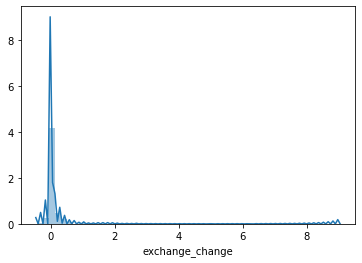

In [42]:
sns.distplot(crisissample['exchange_change'])

In [44]:
tranquilsample = crisis4[crisis4["Warning Dummy"]!=1]
tranquilsample

,year,exchange_change,pred,ISO2 Code,Indicator,Severe Warning,Warning Dummy
300,1990-08-01,0.000000,0.155709,AF,Tranquil,0,0
302,1990-08-01,2.198391,0.381595,AR,Tranquil,0,0
303,1990-08-01,0.000000,0.348212,AZ,Tranquil,0,0
304,1990-08-01,0.000000,0.145175,BD,Tranquil,0,0
305,1990-08-01,0.000000,0.392016,BG,Tranquil,0,0
...,...,...,...,...,...,...,...
17844,2019-10-01,-0.023100,0.286226,UA,Tranquil,0,0
17845,2019-10-01,0.008627,0.050414,UG,Tranquil,0,0
17846,2019-10-01,0.044708,0.083771,UY,Tranquil,0,0
17848,2019-10-01,0.002089,0.042309,VN,Tranquil,0,0


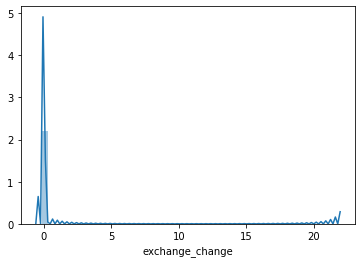

In [46]:
sns.distplot(tranquilsample['exchange_change'])

In [54]:
from scipy.stats import kurtosis
from scipy.stats import skew

meantranquil = np.mean(tranquilsample['exchange_change'])
stdtranquil = np.var(tranquilsample['exchange_change'])
skewnesstranquil = skew(tranquilsample['exchange_change'])
kurtosistranquil = kurtosis(tranquilsample['exchange_change'])
skewnesstranquil

98.20729153862894

In [55]:
meancrisis = np.mean(crisissample['exchange_change'])
stdcrisis = np.var(crisissample['exchange_change'])
skewnesscrisis = skew(crisissample['exchange_change'])
kurtosiscrisis = kurtosis(crisissample['exchange_change'])
skewnesscrisis

11.87495762399481